In [3]:
import numpy as np
import sys
if "../" not in sys.path:
    sys.path.append("../")
from collections import defaultdict
from lib.envs.blackjack import BlackjackEnv
from lib import plotting
import matplotlib

C:\Users\Admin\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
env = BlackjackEnv()

In [7]:
def make_epsilon_greedy_policy(Q, epsilon):
    def policy(state):
        A = epsilon*np.ones(env.action_space.n, dtype=float)/env.action_space.n
        best_action = np.argmax(Q[state])
        A[best_action] += 1.0-epsilon
        return A
    return policy

In [9]:
def monte_carlo_control(env, num_episodes, discount=1.0, epsilon=0.1):
    Q = defaultdict(lambda : np.zeros(env.action_space.n))
    C = defaultdict(lambda : np.zeros(env.action_space.n))
    returns = defaultdict(lambda : np.zeros(env.action_space.n))
    
    epsilon_greedy_policy = make_epsilon_greedy_policy(Q, epsilon)
    
    for episode in range(num_episodes):
        # generate an episode
        episode = []
        state = env.reset()
        for t in range(100):
            action_probs = epsilon_greedy_policy(state)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        
        # evaluate action values
        state_action_pairs = set((p[0], p[1]) for p in episode)
        for state, action in state_action_pairs:
            first_occurrence = next(i for i,v in enumerate(episode) if (v[0]==state and v[1]==action))
            returns[state][action] += sum(x[2]*(discount**i) for i,x in enumerate(episode[first_occurrence:]))
            C[state][action] += 1.0
            Q[state][action] = returns[state][action]/C[state][action]
        
        # policy is improved inherently based on Q updates
    
    return Q, epsilon_greedy_policy

In [11]:
Q, policy = monte_carlo_control(env, num_episodes=500000, epsilon=0.1)


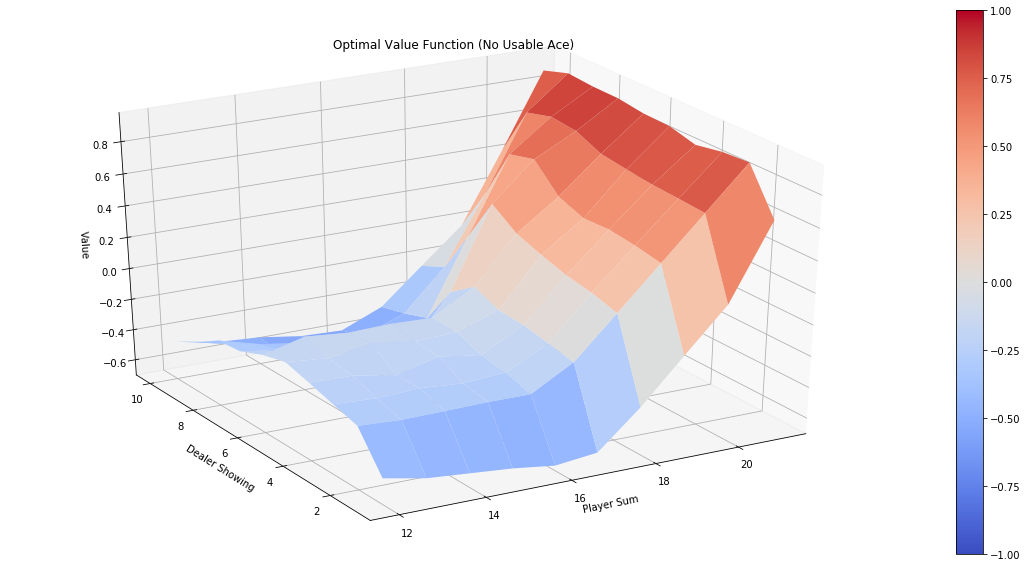

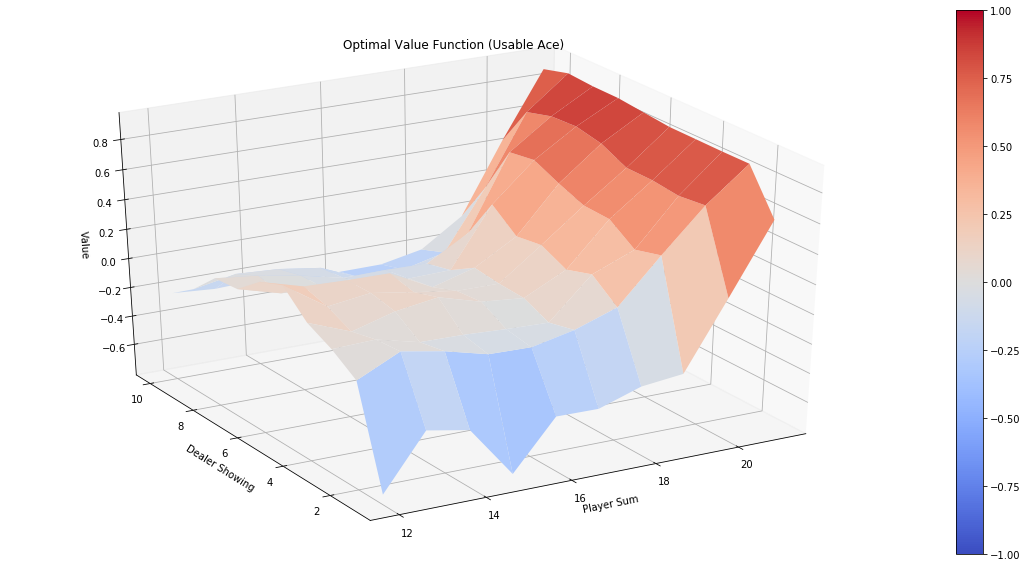

In [12]:
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")